<h2><b><u>Case Study: Heart Disease Dataset Answers </u></b></h2>
<h2> Part 1 of 3 </h2>

<h2> Background </h2>
<p>Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. ⅘ of CVD deaths are due to heart attacks and strokes, and ⅓  of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.
People with cardiovascular disease need early detection and management wherein a machine learning model can be of great help to indicate key factors of heart disease.</p>

<h3> Dataset Background </h3>
<p> The Heart Failure Prediction Dataset is a conglomoerate dataset of indepenent pre-existing datasets. The datasets were combined over their 11 common features. The sources of the conglomoerate datasets that capture the data are:</p>
    <ul>
        <li>Cleveland: 303 Observations </li>
        <li> Hungarian: 294 Observations </li> 
        <li> Switzerland: 123 Observations </li>
        <li> Long Beach VA: 200 Observations </li>
        <li> Stalog Heart Data Set: 270 Observations </li>
    </ul>
<p>The final dataset had 918 observations (272 observations were repeated from the 1190 total observations) aswell as 12 attributes</p>
<p> <h4>The 12 attributes include the following</h4></p>
 <ul>
        <li>Age:int, ranging from 28-77 </li>
        <li> Sex:char,[M: Male, F: Female]</li> 
        <li> Chest Pain Type:string, 4 Types </li>
                <ul> <li> Typical Angina </li>
                <li> Atypical Angina </li>
                <li> Non-Anginal Pain </li>
                <li> Asymptomatic </li> </ul>  
        <li> Resting Blood Pressure: int ranging from 80-200 </li>
        <li> Cholesterol: int ranging from 0-400</li>
        <li>Fasting Blood Sugar:bool, 1: if FastingBS > 120, 0: if otherwise </li>
        <li> Resting ECG: string, resting ECG results: Normal, LVH,  ST </li> 
        <li> Max Heart Rate:int ranging between 60-202 </li>
        <li> Exercise Angina: exercise-induced Angina [Y: Yes, N: No] </li> 
        <li> Oldpeak: int, ranging between -2.6-6.2</li>
        <li> ST_Slope: The slope of the peak exercise ST segment</li> 
                <ul> <li> Up: upsloping </li>
                    <li> Flat: flat slope </li>
                    <li> Down: Downsloping </li>
               </ul>
        <li> Heart Disease: output class [1: heart disease positive, 0: Normal heart]</li>
    </ul> 



<h3><b><i>Goal</i></b></h3>
<p> With the magnitude of how deadly heart disease is, and how it occurs prematurely with individuals under 70 in many cases, what, if any, are indicators to help pre diagnose individuals who share attributes with those who have experienced CVD? </p>

<p>It is our goal to determine how the above attributes correlate with heart disease, determine if those findings are significant, and create a prediction to evaluate ones's risk of heart disease based on their attributes values using correlation calculations, decision tree classifications, and logistic regression model. </p>

<h3><b> This Case Study: Exploratory Data Analysis</b> </h3>
<p> Within our exploratory data analysis (EDA), we want to get a general understanding of the dataset and the variables alike </p>

<h4><b>Loading the Data</b></h4>

In [9]:
# Importing the packages
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns

In [10]:
# Load CSV file as pandas dataframe
heart_csv = pd.read_csv("data/heart.csv")

<h3> Exploring the Data </h3>
Use the describe function to investigate what variables are included within the dataset

In [4]:
#this gives the descriptive statistics for all of the following qualitative variables 
#the describe function gives a lot of information about the variables in interest.
heart_csv.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<h4> Investigating the Variables </h4>

To determine how many individuals in this dataset have heart disease, <b>create a countplot </b>

ValueError: dictionary update sequence element #0 has length 1; 2 is required

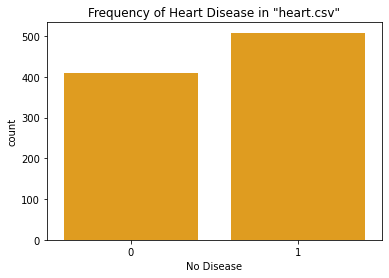

In [11]:
# Create a countplot to show the amount of people with and without heart disease

countplot = sns.countplot(x='HeartDisease', data=heart_csv, color="Orange")
countplot.set_title('Frequency of Heart Disease in "heart.csv"')
countplot.set_xlabel('No Disease', 'Diseased')
countplot.set_ylabel('Frequency')

print(heart_csv['HeartDisease'].value_counts())

          HeartDisease
Age                   
(20, 30]      0.000000
(30, 40]      0.363636
(40, 50]      0.417040
(50, 60]      0.582677
(60, 70]      0.736041
(70, 80]      0.666667


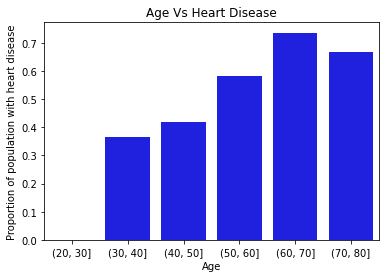

In [8]:
##Graph already done for you
# Groups Age from 20 to 90 by an increment of 10 and takes the mean of all the HeartDisease values in each group
heart_age_df = heart_csv.groupby(pd.cut(heart_csv["Age"], np.arange(20, 90, 10))).mean()
print(heart_age_df[["HeartDisease"]])

# Creates a barplot of the Age groups on the x-axis and the mean HeartDisease on the y-axis
heart_age_plot = sns.barplot(x = heart_age_df.index, y = "HeartDisease", data = heart_age_df, color = "blue")

heart_age_plot.axes.set_title("Age Vs Heart Disease")

plt.xlabel("Age")
plt.ylabel("Proportion of population with heart disease")
plt.show()

<h4>Age Histograms </h4>

The above two graphs visualize age from different perspectives. The first histogram indicates that there is an almost normal distribution of ages within the dataset, creating a peak age around 55. The second histogram indicates the common ages of individuals who are heart disease positive, visualizing it in 10 year groupings. The histogram is skewed left with the peak being at 60,70, indicating that most positive heart disease patients lie that age bracket.

<h3> Blood Pressure Analysis</h3>

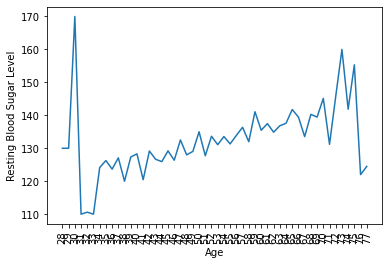

In [33]:
#Plot using pivot_table function, create a pivot table for the Resting BP value.
pivot_BP = heart_csv.pivot_table(values="RestingBP", index="Age", aggfunc=[np.sum, np.mean, np.min, np.max, np.std])
pivot_BP

#pulls out the mean resing blood pressure level, and shows the relationship between the index aka Age
plt.plot(pivot_BP.index, pivot_BP["mean"])
plt.xticks(pivot_BP.index, rotation=90)
plt.xlabel("Age")
plt.ylabel("Resting Blood Sugar Level")
plt.show()

Using the age histogram, <b>create the same plot for resting blood pressure.</b>

            HeartDisease
RestingBP               
(60, 90]        0.000000
(90, 120]       0.487973
(120, 150]      0.559055
(150, 180]      0.678899
(180, 210]      0.875000


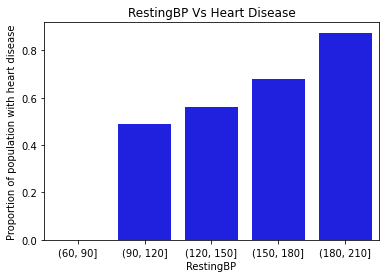

In [34]:
# Groups RestingBP from 60 to 240 by an increment of 30 and takes the mean of all the HeartDisease values in each group
heart_RestingBP_df = heart_csv.groupby(pd.cut(heart_csv["RestingBP"], np.arange(60, 240, 30))).mean()
print(heart_RestingBP_df[["HeartDisease"]])

# Creates a barplot of the RestingBP groups on the x-axis and the mean HeartDisease on the y-axis
heart_RestingBP_plot = sns.barplot(x = heart_RestingBP_df.index, y = "HeartDisease", data = heart_RestingBP_df, color = "blue")

heart_RestingBP_plot.axes.set_title("RestingBP Vs Heart Disease")

#label the axis
plt.xlabel("RestingBP")
plt.ylabel("Proportion of population with heart disease")
plt.show()

<p> The above two visualizations are very telling of the data. Age and resting blood pressure have an positive linear correlation and as do resting blood pressure and heart disease. We determined above that age and heart disease were also a linear correlation with having positive heart disease, so these findings are accurate </p>

<h3> Old Peak Analysis </h3>

            HeartDisease
Oldpeak                 
(0.0, 0.5]      0.337662
(0.5, 1.0]      0.629921
(1.0, 1.5]      0.747748
(1.5, 2.0]      0.778689
(2.0, 2.5]      0.896552
(2.5, 3.0]      0.906977
(3.0, 3.5]      0.875000
(3.5, 4.0]      1.000000
(4.0, 4.5]      0.666667
(4.5, 5.0]      1.000000


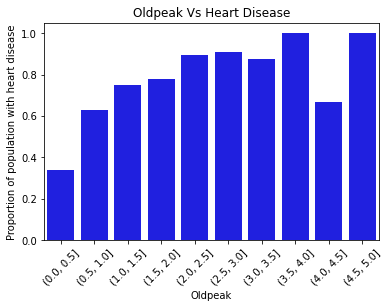

In [35]:
# Groups Oldpeak from 0 to 5.5 by an increment of .5 and takes the mean of all the values in each group
heart_Oldpeak_df = heart_csv.groupby(pd.cut(heart_csv["Oldpeak"], np.arange(0, 5.5, .5))).mean()
print(heart_Oldpeak_df[["HeartDisease"]])

# Creates a barplot of the Oldpeak groups on the x-axis and the mean HeartDisease on the y-axis
heart_Oldpeak_plot = sns.barplot(x = heart_Oldpeak_df.index, y = "HeartDisease", data = heart_Oldpeak_df, color = "blue")

heart_Oldpeak_plot.axes.set_title("Oldpeak Vs Heart Disease")

plt.xticks(rotation=45)
plt.xlabel("Oldpeak")
plt.ylabel("Proportion of population with heart disease")
plt.show()

Text(0.5, 1.0, 'Old Peak by Age hued on Heart Disease')

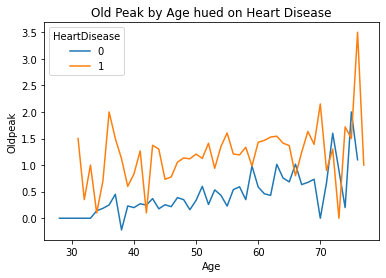

In [37]:
# Create line graph to show differences in Old peak between individuals with and without Heart Disease

heart_line = sns.lineplot(data=heart_csv, x='Age',y='Oldpeak', hue='HeartDisease', ci=None)
heart_line.set_title("Old Peak by Age hued on Heart Disease")

<p>It appears that the individuals with heart disease has a higher oldpeak value that those who do not have heart disease.</p>


<h3> Sexes variable </h3>
<p> To understand if either sex has greater ratio of having heart disease, we evaluated the sexes </p>

Text(33.0, 0.5, 'Sex of Patients')

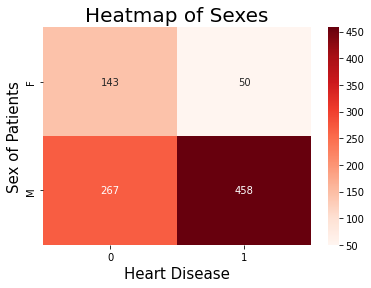

In [12]:
#creating cross tab to form heatmap 
#showing sex with Heart Disease
heat_sex = pd.crosstab(heart_csv['Sex'],heart_csv['HeartDisease'], 
                       values = heart_csv["HeartDisease"], aggfunc= 'count')

#heat map of sexes with heart disease
sns.heatmap(heat_sex,annot=True, cmap= 'Reds',fmt='g')
#labels for heatmap
plt.title('Heatmap of Sexes', fontsize = 20) # title with fontsize 20
plt.xlabel('Heart Disease', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Sex of Patients', fontsize = 15) # y-axis label with fontsize 15\

In [43]:
# The values of the HeartDisease column are 1 and 0, with 1 being a positive case of heart disease and 0 being
# negative for heart disease. Therefore, we can get the proportion of heart disease for different populations by
# taking the average of HeartDisease for each population.
# Proportion of men with heart disease
heart_M_count = heart_csv[(heart_csv["Sex"] == "M")]["HeartDisease"].mean()
print(heart_M_count)
# Proportion of women with heart disease
heart_F_count = heart_csv[(heart_csv["Sex"] == "F")]["HeartDisease"].mean()
print(heart_F_count)

0.6317241379310344
0.25906735751295334


Text(0.5, 1.0, 'Heatmap of Ages by Sex')

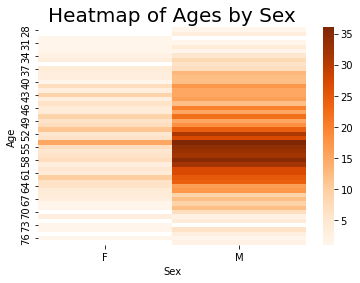

In [45]:
# Create heatmap to show which age range and gender is most likely to have heart disease by count function
# Create a crossmap in order to create a heatmap

heart_ct = pd.crosstab(heart_csv['Age'], heart_csv['Sex'], values=heart_csv['HeartDisease'], aggfunc='count')
heart_heat = sns.heatmap(heart_ct, cmap="Oranges")

plt.title('Heatmap of Ages by Sex', fontsize = 20)


The above plots show that there is a skewed number of men and women in the dataset. Specifically, men have a way higher chance of having heart disease, and of the men who are apart of this dataset, 63% have heart disease, whereas the women of this dataset only 26% have heart disease. Moreover, men in their early to late 50s appear to have such disease.

<h3> Chest Pain Type </h3>

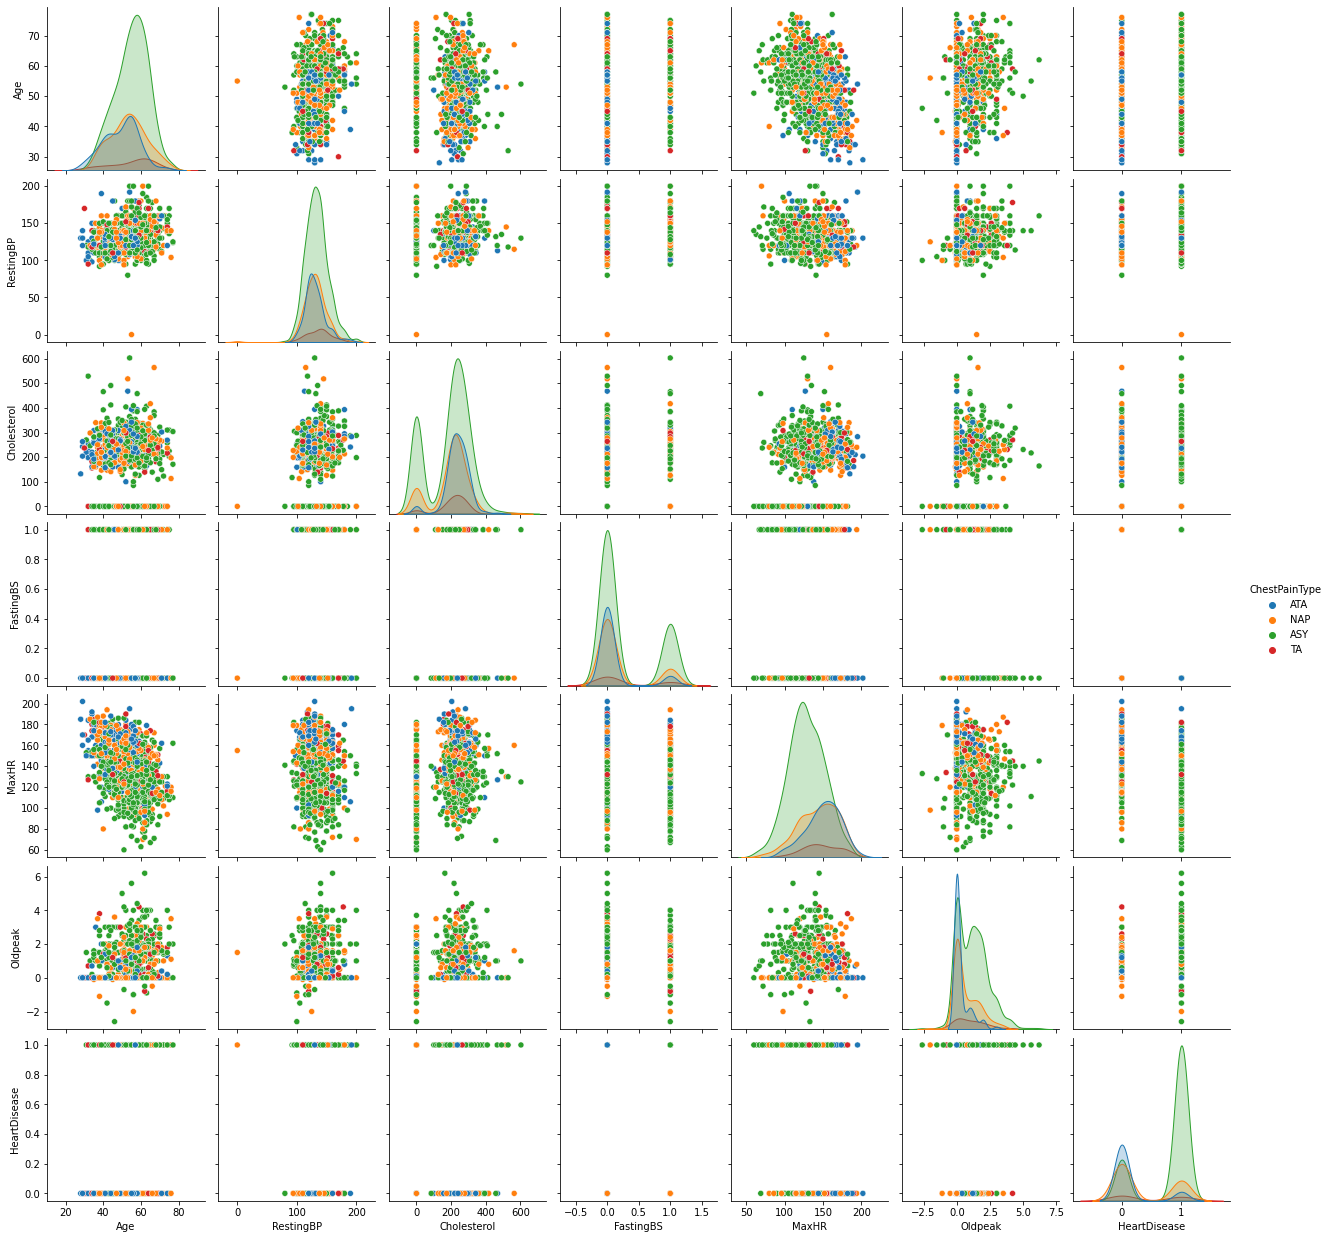

In [46]:
#pairplots create a whole view of how each variable relate to one another. 
#Here, I show how each of types of chest pain are displayed with the rest of the variables. 
sns.pairplot(heart_csv, hue='ChestPainType')

<h4>Chest Pain Type Analysis </h4>

The majority of our patients appear to have asymptomatic pain, meaning that their is very little or no chest pain, therefore it would be hard to use actual pain to determine if one has heart disease 

<h3> Cholesterol Variable </h3>

             HeartDisease
Cholesterol              
(50, 100]        0.333333
(100, 150]       0.529412
(150, 200]       0.376923
(200, 250]       0.446735
(250, 300]       0.554455
(300, 350]       0.526316
(350, 400]       0.500000
(400, 450]       0.600000


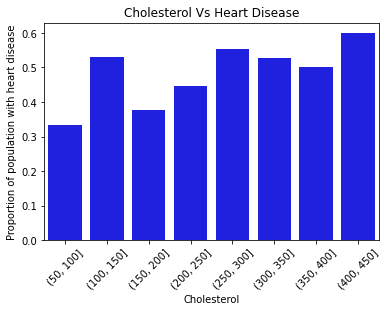

In [47]:
# Groups Cholesterol from 50 to 500 by an increment of 50 and takes the mean of all the values in each group
heart_cholesterol_df = heart_csv.groupby(pd.cut(heart_csv["Cholesterol"], np.arange(50, 500, 50))).mean()
print(heart_cholesterol_df[["HeartDisease"]])

# Creates a barplot of the Cholesterol groups on the x-axis and the mean HeartDisease on the y-axis
heart_cholesterol_plot = sns.barplot(x = heart_cholesterol_df.index, y = "HeartDisease", data = heart_cholesterol_df, color = "blue")

heart_cholesterol_plot.axes.set_title("Cholesterol Vs Heart Disease")

plt.xticks(rotation=45)
plt.xlabel("Cholesterol")
plt.ylabel("Proportion of population with heart disease")
plt.show()

There appears to be no correlation between cholesterol level and heart disease. A good distinction to make as to not waste time on analyzing it further 

<h3> Exploratory Interpretation </h3>

<p> from the heatmaps and EDA above, we can determine that many individuals with heart disease have the following traits.</p>
 
<ul>
    <li> 
        Mostly male </li>
    <li>
        Older individuals </li>
    <li> Lower heart rate </li>
    <li> Distinct old peak value </li>
    </ul>
 <p> To determine if these traits are significant, we will perform statistical Hypothesis tests to evaluate if the p value is significant or not</p>

<h2> Next Part </h2>
The next part of this Case Study is to determine if our exploratory interpretation and observations are valid using statistical tests such as hypothesis tests 